In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
employees = pd.read_excel('employees.xls')

In [3]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 11 columns):
EMPLOYEE_ID       107 non-null int64
FIRST_NAME        107 non-null object
LAST_NAME         107 non-null object
EMAIL             107 non-null object
PHONE_NUMBER      107 non-null object
HIRE_DATE         107 non-null object
JOB_ID            107 non-null object
SALARY            107 non-null int64
COMMISSION_PCT    35 non-null float64
MANAGER_ID        106 non-null float64
DEPARTMENT_ID     106 non-null float64
dtypes: float64(3), int64(2), object(6)
memory usage: 9.3+ KB


In [4]:
employees.shape

(107, 11)

In [5]:
employees.head()

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL,PHONE_NUMBER,HIRE_DATE,JOB_ID,SALARY,COMMISSION_PCT,MANAGER_ID,DEPARTMENT_ID
0,100,Steven,King,SKING,515.123.4567,2003-06-17 00:00:00,AD_PRES,24000,NaN,NaN,90.0
1,101,Neena,Kochhar,NKOCHHAR,515.123.4568,2005-09-21 00:00:00,AD_VP,17000,NaN,100.0,90.0
2,102,Lex,De Haan,LDEHAAN,515.123.4569,2001-01-13 00:00:00,AD_VP,17000,NaN,100.0,90.0
3,103,Alexander,Hunold,AHUNOLD,590.423.4567,2006-01-03 00:00:00,IT_PROG,9000,NaN,102.0,60.0
4,104,Bruce,Ernst,BERNST,590.423.4568,2007-05-21 00:00:00,IT_PROG,6000,NaN,103.0,60.0


In [6]:
departments = pd.read_excel('departments.xls')

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [7]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
DEPARTMENT_ID      27 non-null int64
DEPARTMENT_NAME    27 non-null object
MANAGER_ID         11 non-null float64
LOCATION_ID        27 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 992.0+ bytes


In [8]:
departments.shape

(27, 4)

In [9]:
departments.head()

,DEPARTMENT_ID,DEPARTMENT_NAME,MANAGER_ID,LOCATION_ID
0,10,Administration,200.0,1700
1,20,Marketing,201.0,1800
2,30,Purchasing,114.0,1700
3,40,Human Resources,203.0,2400
4,50,Shipping,121.0,1500


In [10]:
jobs = pd.read_excel('jobs.xls')

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [11]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 4 columns):
JOB_ID        19 non-null object
JOB_TITLE     19 non-null object
MIN_SALARY    19 non-null int64
MAX_SALARY    19 non-null int64
dtypes: int64(2), object(2)
memory usage: 736.0+ bytes


In [12]:
jobs.shape

(19, 4)

In [13]:
jobs.head()

,JOB_ID,JOB_TITLE,MIN_SALARY,MAX_SALARY
0,AC_ACCOUNT,Public Accountant,4200,9000
1,AC_MGR,Accounting Manager,8200,16000
2,AD_ASST,Administration Assistant,3000,6000
3,AD_PRES,President,20080,40000
4,AD_VP,Administration Vice President,15000,30000


In [14]:
emp = employees[['EMPLOYEE_ID','FIRST_NAME','LAST_NAME','HIRE_DATE','SALARY','DEPARTMENT_ID','JOB_ID']]

In [15]:
emp.head()

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,HIRE_DATE,SALARY,DEPARTMENT_ID,JOB_ID
0,100,Steven,King,2003-06-17 00:00:00,24000,90.0,AD_PRES
1,101,Neena,Kochhar,2005-09-21 00:00:00,17000,90.0,AD_VP
2,102,Lex,De Haan,2001-01-13 00:00:00,17000,90.0,AD_VP
3,103,Alexander,Hunold,2006-01-03 00:00:00,9000,60.0,IT_PROG
4,104,Bruce,Ernst,2007-05-21 00:00:00,6000,60.0,IT_PROG


In [16]:
emp = emp.merge(departments[['DEPARTMENT_ID','DEPARTMENT_NAME']], on='DEPARTMENT_ID', how='left')

In [17]:
emp.head()

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,HIRE_DATE,SALARY,DEPARTMENT_ID,JOB_ID,DEPARTMENT_NAME
0,100,Steven,King,2003-06-17 00:00:00,24000,90.0,AD_PRES,Executive
1,101,Neena,Kochhar,2005-09-21 00:00:00,17000,90.0,AD_VP,Executive
2,102,Lex,De Haan,2001-01-13 00:00:00,17000,90.0,AD_VP,Executive
3,103,Alexander,Hunold,2006-01-03 00:00:00,9000,60.0,IT_PROG,IT
4,104,Bruce,Ernst,2007-05-21 00:00:00,6000,60.0,IT_PROG,IT


In [18]:
emp = emp.merge(jobs[['JOB_ID','JOB_TITLE']], on='JOB_ID', how='inner')

In [19]:
emp.head()

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,HIRE_DATE,SALARY,DEPARTMENT_ID,JOB_ID,DEPARTMENT_NAME,JOB_TITLE
0,100,Steven,King,2003-06-17 00:00:00,24000,90.0,AD_PRES,Executive,President
1,101,Neena,Kochhar,2005-09-21 00:00:00,17000,90.0,AD_VP,Executive,Administration Vice President
2,102,Lex,De Haan,2001-01-13 00:00:00,17000,90.0,AD_VP,Executive,Administration Vice President
3,103,Alexander,Hunold,2006-01-03 00:00:00,9000,60.0,IT_PROG,IT,Programmer
4,104,Bruce,Ernst,2007-05-21 00:00:00,6000,60.0,IT_PROG,IT,Programmer


In [22]:
emp[(emp['DEPARTMENT_ID']==50) | (emp['DEPARTMENT_ID']==90)].sort_values(by=['DEPARTMENT_ID','SALARY'], 
                                                                         ascending=[False,True]).head()

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,HIRE_DATE,SALARY,DEPARTMENT_ID,JOB_ID,DEPARTMENT_NAME,JOB_TITLE
1,101,Neena,Kochhar,2005-09-21 00:00:00,17000,90.0,AD_VP,Executive,Administration Vice President
2,102,Lex,De Haan,2001-01-13 00:00:00,17000,90.0,AD_VP,Executive,Administration Vice President
0,100,Steven,King,2003-06-17 00:00:00,24000,90.0,AD_PRES,Executive,President
32,132,TJ,Olson,2007-04-10 00:00:00,2100,50.0,ST_CLERK,Shipping,Stock Clerk
28,128,Steven,Markle,2008-03-08 00:00:00,2200,50.0,ST_CLERK,Shipping,Stock Clerk


In [24]:
emp.groupby(['DEPARTMENT_ID','DEPARTMENT_NAME']).SALARY.sum().reset_index().sort_values(by='SALARY', ascending=False).head(1)

,DEPARTMENT_ID,DEPARTMENT_NAME,SALARY
7,80.0,Sales,304500


In [21]:
emp[(emp['DEPARTMENT_NAME']=='Sales') & (emp['SALARY']>=5000) & (emp['SALARY']<=7000)]

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,HIRE_DATE,SALARY,DEPARTMENT_ID,JOB_ID,DEPARTMENT_NAME,JOB_TITLE
55,155,Oliver,Tuvault,2007-11-23 00:00:00,7000,80.0,SA_REP,Sales,Sales Representative
61,161,Sarath,Sewall,2006-11-03 00:00:00,7000,80.0,SA_REP,Sales,Sales Representative
65,165,David,Lee,2008-02-23 00:00:00,6800,80.0,SA_REP,Sales,Sales Representative
66,166,Sundar,Ande,2008-03-24 00:00:00,6400,80.0,SA_REP,Sales,Sales Representative
67,167,Amit,Banda,2008-04-21 00:00:00,6200,80.0,SA_REP,Sales,Sales Representative
73,173,Sundita,Kumar,2008-04-21 00:00:00,6100,80.0,SA_REP,Sales,Sales Representative
79,179,Charles,Johnson,2008-01-04 00:00:00,6200,80.0,SA_REP,Sales,Sales Representative


In [22]:
emp[emp['DEPARTMENT_ID'].isna()]

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,HIRE_DATE,SALARY,DEPARTMENT_ID,JOB_ID,DEPARTMENT_NAME,JOB_TITLE
78,178,Kimberely,Grant,2007-05-24 00:00:00,7000,NaN,SA_REP,NaN,Sales Representative


In [23]:
emp['SALARY'].describe()

count      107.000000
mean      6461.831776
std       3909.579731
min       2100.000000
25%       3100.000000
50%       6200.000000
75%       8900.000000
max      24000.000000
Name: SALARY, dtype: float64

In [24]:
avg_sal = emp['SALARY'].mean()
print('Average of Salary:', avg_sal)

Average of Salary: 6461.8317757009345


In [25]:
df = emp[emp['SALARY']>avg_sal][['EMPLOYEE_ID','FIRST_NAME','LAST_NAME','SALARY','DEPARTMENT_NAME','JOB_TITLE']]

In [26]:
df.sort_values(by=['DEPARTMENT_NAME','SALARY'], ascending=[True,False], inplace=True)

In [27]:
df.reset_index(inplace=True, drop=True)
df.head(10)

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,SALARY,DEPARTMENT_NAME,JOB_TITLE
0,205,Shelley,Higgins,12008,Accounting,Accounting Manager
1,206,William,Gietz,8300,Accounting,Public Accountant
2,100,Steven,King,24000,Executive,President
3,101,Neena,Kochhar,17000,Executive,Administration Vice President
4,102,Lex,De Haan,17000,Executive,Administration Vice President
5,108,Nancy,Greenberg,12008,Finance,Finance Manager
6,109,Daniel,Faviet,9000,Finance,Accountant
7,110,John,Chen,8200,Finance,Accountant
8,112,Jose Manuel,Urman,7800,Finance,Accountant
9,111,Ismael,Sciarra,7700,Finance,Accountant


In [28]:
emp[emp['SALARY']==emp['SALARY'].max()]

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,HIRE_DATE,SALARY,DEPARTMENT_ID,JOB_ID,DEPARTMENT_NAME,JOB_TITLE
0,100,Steven,King,2003-06-17 00:00:00,24000,90.0,AD_PRES,Executive,President


In [29]:
emp[emp['SALARY']==emp['SALARY'].min()]

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,HIRE_DATE,SALARY,DEPARTMENT_ID,JOB_ID,DEPARTMENT_NAME,JOB_TITLE
32,132,TJ,Olson,2007-04-10 00:00:00,2100,50.0,ST_CLERK,Shipping,Stock Clerk


In [37]:
df_ = pd.merge(emp, emp.groupby('DEPARTMENT_ID').SALARY.max().reset_index().rename(columns={'SALARY':'MAX_SAL'}))[['DEPARTMENT_ID','EMPLOYEE_ID','FIRST_NAME','SALARY','MAX_SAL']]

In [41]:
df_[df_['SALARY']==df_['MAX_SAL']].sort_values(by='DEPARTMENT_ID')[['DEPARTMENT_ID','EMPLOYEE_ID','FIRST_NAME','SALARY']].set_index('DEPARTMENT_ID')

,EMPLOYEE_ID,FIRST_NAME,SALARY
DEPARTMENT_ID,,,
10.0,200,Jennifer,4400
20.0,201,Michael,13000
30.0,114,Den,11000
40.0,203,Susan,6500
50.0,121,Adam,8200
60.0,103,Alexander,9000
70.0,204,Hermann,10000
80.0,145,John,14000
90.0,100,Steven,24000


In [30]:
emp['BONUS'] = emp['SALARY']+500

In [31]:
emp[['EMPLOYEE_ID','FIRST_NAME','SALARY','BONUS']].head()

,EMPLOYEE_ID,FIRST_NAME,SALARY,BONUS
0,100,Steven,24000,24500
1,101,Neena,17000,17500
2,102,Lex,17000,17500
3,103,Alexander,9000,9500
4,104,Bruce,6000,6500


In [32]:
emp['NAM_VAO_LAM'] = pd.DatetimeIndex(emp['HIRE_DATE']).year

In [33]:
emp[['EMPLOYEE_ID','FIRST_NAME','HIRE_DATE','NAM_VAO_LAM']].head()

,EMPLOYEE_ID,FIRST_NAME,HIRE_DATE,NAM_VAO_LAM
0,100,Steven,2003-06-17 00:00:00,2003
1,101,Neena,2005-09-21 00:00:00,2005
2,102,Lex,2001-01-13 00:00:00,2001
3,103,Alexander,2006-01-03 00:00:00,2006
4,104,Bruce,2007-05-21 00:00:00,2007


In [34]:
emp.drop(columns=['HIRE_DATE'], inplace=True)

In [35]:
emp.columns

Index(['EMPLOYEE_ID', 'FIRST_NAME', 'LAST_NAME', 'SALARY', 'DEPARTMENT_ID',
       'JOB_ID', 'DEPARTMENT_NAME', 'JOB_TITLE', 'BONUS', 'NAM_VAO_LAM'],
      dtype='object')

In [51]:
emp[['EMPLOYEE_ID','FIRST_NAME','NAM_VAO_LAM']].head()

,EMPLOYEE_ID,FIRST_NAME,NAM_VAO_LAM
0,100,Steven,2003
1,101,Neena,2005
2,102,Lex,2001
3,103,Alexander,2006
4,104,Bruce,2007


In [36]:
emp.groupby('DEPARTMENT_NAME').SALARY.agg(['count','max','min','mean','sum']).reset_index()

,DEPARTMENT_NAME,count,max,min,mean,sum
0,Accounting,2,12008,8300,10154.000000,20308
1,Administration,1,4400,4400,4400.000000,4400
2,Executive,3,24000,17000,19333.333333,58000
3,Finance,6,12008,6900,8601.333333,51608
4,Human Resources,1,6500,6500,6500.000000,6500
5,IT,5,9000,4200,5760.000000,28800
6,Marketing,2,13000,6000,9500.000000,19000
7,Public Relations,1,10000,10000,10000.000000,10000
8,Purchasing,6,11000,2500,4150.000000,24900
9,Sales,34,14000,6100,8955.882353,304500


In [37]:
emp.groupby('NAM_VAO_LAM', as_index=False).EMPLOYEE_ID.count().sort_values(by='EMPLOYEE_ID',ascending=False).reset_index(drop=True).rename(columns={'EMPLOYEE_ID':'COUNT'})

,NAM_VAO_LAM,COUNT
0,2005,29
1,2006,24
2,2007,19
3,2008,11
4,2004,10
5,2002,7
6,2003,6
7,2001,1


In [38]:
emp.groupby(['DEPARTMENT_NAME','JOB_TITLE'], as_index=False).EMPLOYEE_ID.count().rename(columns={'EMPLOYEE_ID':'COUNT'})

,DEPARTMENT_NAME,JOB_TITLE,COUNT
0,Accounting,Accounting Manager,1
1,Accounting,Public Accountant,1
2,Administration,Administration Assistant,1
3,Executive,Administration Vice President,2
4,Executive,President,1
5,Finance,Accountant,5
6,Finance,Finance Manager,1
7,Human Resources,Human Resources Representative,1
8,IT,Programmer,5
9,Marketing,Marketing Manager,1


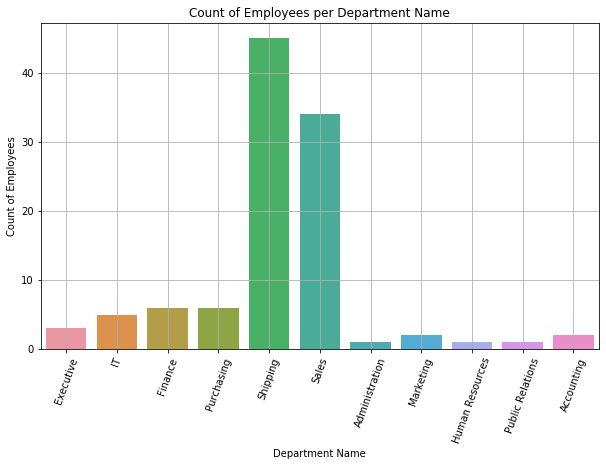

In [44]:
plt.figure(figsize=(10,6))
sb.countplot(x='DEPARTMENT_NAME', data=emp)
plt.xticks(rotation=70) 
plt.xlabel('Department Name') 
plt.ylabel('Count of Employees') 
plt.title('Count of Employees per Department Name') 
plt.grid()
plt.show()

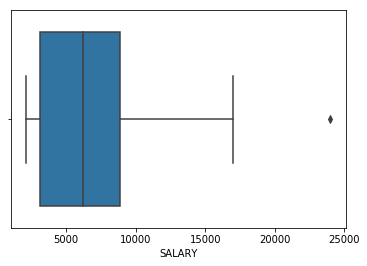

In [40]:
sb.boxplot(x=emp['SALARY'])

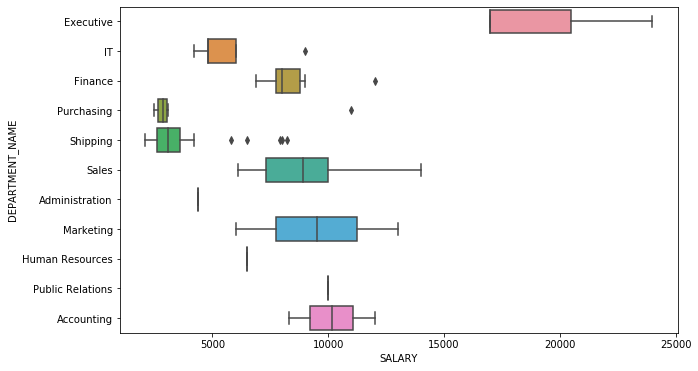

In [68]:
plt.figure(figsize=(10,6))
sb.boxplot(y="DEPARTMENT_NAME", x="SALARY", data=emp)

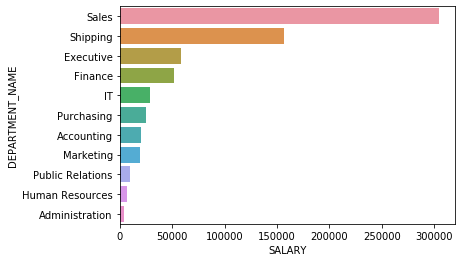

In [45]:
sb.barplot(y='DEPARTMENT_NAME', x='SALARY', data=emp.groupby('DEPARTMENT_NAME',as_index=False).SALARY.sum().sort_values(by='SALARY', ascending=False))

In [46]:
df = emp.groupby('NAM_VAO_LAM', as_index=False).EMPLOYEE_ID.count().sort_values(by='EMPLOYEE_ID',ascending=False).reset_index(drop=True).rename(columns={'EMPLOYEE_ID':'COUNT'})

In [47]:
df

,NAM_VAO_LAM,COUNT
0,2005,29
1,2006,24
2,2007,19
3,2008,11
4,2004,10
5,2002,7
6,2003,6
7,2001,1


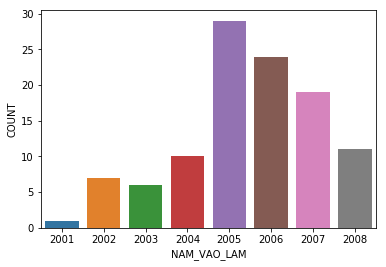

In [48]:
sb.barplot(x='NAM_VAO_LAM', y='COUNT', data=df)

In [49]:
df = emp[(emp['DEPARTMENT_ID']==50) | (emp['DEPARTMENT_ID']==80)].groupby('DEPARTMENT_NAME', as_index=False).SALARY.sum()
df

,DEPARTMENT_NAME,SALARY
0,Sales,304500
1,Shipping,156400


In [62]:
df_ = emp['DEPARTMENT_NAME'].value_counts().reset_index().head()
df_

,index,DEPARTMENT_NAME
0,Shipping,45
1,Sales,34
2,Purchasing,6
3,Finance,6
4,IT,5


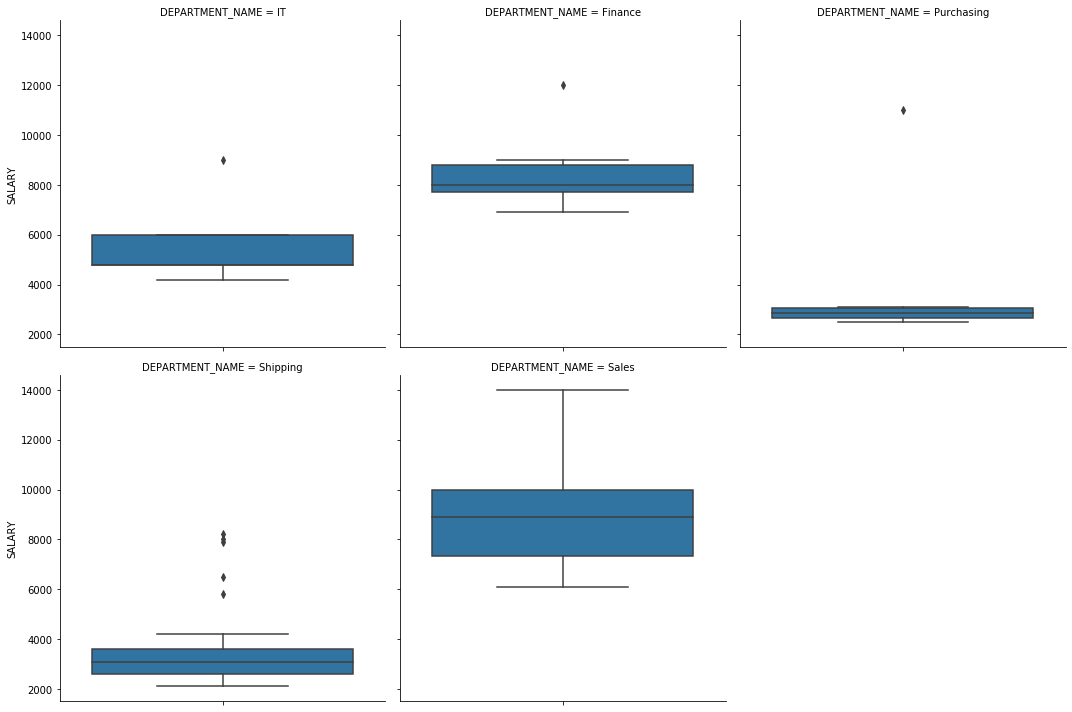

In [67]:
sb.catplot(data=emp[emp['DEPARTMENT_NAME'].isin(df_['index'])], y='SALARY', kind='box', col='DEPARTMENT_NAME', col_wrap=3);